# Chapter 25. Introduction to the Various Connectivity Analyses

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft

### 25.3

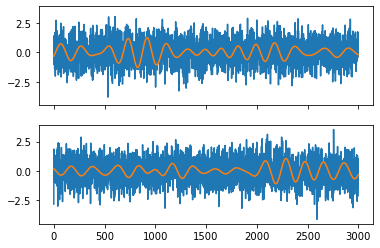

In [14]:
s_rate = 1000
rand_sig1 = np.random.randn(3*s_rate)
rand_sig2 = np.random.randn(3*s_rate)

# filter @ 5Hz
f = 5  # freq of wavelet in Hz
time = np.arange(-1, 1 + 1/s_rate, 1/s_rate)  # time for wavelet from -1 to 1 in secs
s = 6/(2*np.pi*f)  # stdev of Gaussian
wavelet = np.exp(2*np.pi*1j*f*time) * np.exp(-time**2 / (2*s**2))

# fft params
n_wavelet =  len(wavelet)
n_data = len(rand_sig1)
n_convolution = n_data+n_wavelet-1
half_of_wavelet_size = len(wavelet)//2

# fft of wavelet and eeg data
convolution_result_fft = ifft(fft(wavelet, n_convolution) * fft(rand_sig1, n_convolution))*np.sqrt(s)/10
filtsig1 = convolution_result_fft[half_of_wavelet_size:-half_of_wavelet_size].real
anglesig1 = np.angle(convolution_result_fft[half_of_wavelet_size:-half_of_wavelet_size])

convolution_result_fft = ifft(fft(wavelet, n_convolution) * fft(rand_sig2, n_convolution))*np.sqrt(s)/10
filtsig2 = convolution_result_fft[half_of_wavelet_size:-half_of_wavelet_size].real
anglesig2 = np.angle(convolution_result_fft[half_of_wavelet_size:-half_of_wavelet_size])

fig, ax = plt.subplots(2,1,sharex='all', sharey='all')
ax[0].plot(rand_sig1)
ax[0].plot(filtsig1)

ax[1].plot(rand_sig2)
ax[1].plot(filtsig2)

In [27]:
correlations = np.zeros((5, int(1000/f)))

# write simpler correlation coeff instead of np.corrcoef
# i.e. the dotproduct between two vecs, divided by their lengths
corr = lambda x,y: x@y/(np.linalg.norm(x)*np.linalg.norm(y))

In [39]:
for i in range(1, int(1000/f)):

    # corr of unfiltered random sig
    correlations[0, i] = corr(rand_sig1[:-i], rand_sig1[i:])

    # corr of filtered sig
    correlations[1, i] = corr(filtsig1[:-i], filtsig1[i:])

    # phase clustering
    correlations[2, i] = np.abs(np.mean(np.exp(1j * np.angle(anglesig1[:-i] -anglesig1[i:]))))

    # diff of correlations of filtered signal
    correlations[3, i] = corr(filtsig2[:-i], filtsig2[i:]) - correlations[1,i]

    # difference of phase clusterings
    correlations[4, i] = np.abs(np.mean(np.exp(1j * np.angle(anglesig2[:-i] -anglesig2[i:])))) - correlations[2,i]

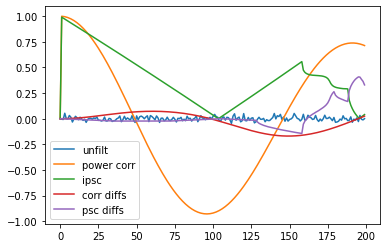

In [35]:
plt.plot(correlations.T)
plt.legend(['unfilt','power corr','ipsc','corr diffs','psc diffs'])